In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
import os
!ls

drive  sample_data


In [ ]:
os.chdir("/content/drive/My Drive/Essay_score")

In [ ]:
!ls


Essay_scoring.py	training_set_rel3.xlsx
Essay_Set_Descriptions	valid_sample_submission_1_column.csv
model.h5		valid_sample_submission_1_column_no_header.csv
model.pickle		valid_sample_submission_2_column.csv
new_df.csv		valid_sample_submission_5_column.csv
test_set.tsv		valid_set.tsv
Training_Materials	valid_set.xls
training_set_rel3.tsv	valid_set.xlsx
training_set_rel3.xls


In [ ]:
df = pd.read_csv("training_set_rel3.tsv", delimiter = "\t",encoding='charmap')
#new_df = pd.read_csv('new_df.csv',encoding='charmap')

In [ ]:
df.tail()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,rater1_trait1,rater1_trait2,rater1_trait3,rater1_trait4,rater1_trait5,rater1_trait6,rater2_trait1,rater2_trait2,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
12971,21626,8,In most stories mothers and daughters are eit...,17,18,NaN,35,NaN,NaN,NaN,4.0,3.0,4.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
12972,21628,8,I never understood the meaning laughter is th...,15,17,NaN,32,NaN,NaN,NaN,3.0,3.0,4.0,3.0,3.0,3.0,4.0,3.0,4.0,4.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
12973,21629,8,"When you laugh, is @CAPS5 out of habit, or is ...",20,26,40.0,40,NaN,NaN,NaN,4.0,4.0,4.0,4.0,4.0,4.0,6.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0
12974,21630,8,Trippin' on fen...,20,20,NaN,40,NaN,NaN,NaN,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN
12975,21633,8,Many people believe that laughter can improve...,20,20,NaN,40,NaN,NaN,NaN,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = df.iloc[:,[0,1,2,6]]

In [ ]:
df.head(2)

,essay_id,essay_set,essay,domain1_score
0,1,1,"Dear local newspaper, I think effects computer...",8
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9


In [ ]:
df.shape

(12976, 4)

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
def sent_count(x):
    essay = str(x)
    sent_list = nltk.sent_tokenize(essay)
    return len(sent_list)


df['sent_count'] = df['essay'].apply(sent_count)


In [ ]:
df.head(2)

,essay_id,essay_set,essay,domain1_score,sent_count
0,1,1,"Dear local newspaper, I think effects computer...",8,16
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9,20


In [ ]:
"""
Average sentence length

"""

def av_sent_len(x):
    essay = str(x)
    word_count = len(essay.split())
    sent_list = nltk.sent_tokenize(str(x))
    sent_count = len(sent_list)
    return int(word_count/sent_count)


df['av_sent_len'] = df['essay'].apply(av_sent_len)


In [ ]:
"""
Cleaning the essay

"""

def clean_essay(x):
  x = re.sub(r'@[A-Z]{2,}\d?,?\'?s? ?','',str(x))
  x = re.sub(r'[^a-zA-Z ]','',x)
  x = nltk.word_tokenize(x)
  x = " ".join(x)
  return x

df['essay'] = df['essay'].apply(clean_essay)


In [ ]:
"""
Adding char count
"""

def char_count(x):
  x = re.sub(r'[\s]','',str(x))
  return len(x)

df['char_count'] = df['essay'].apply(char_count)



In [ ]:

"""
Adding word count

"""

def word_count(x):
  essay = str(x)
  essay = essay.split()
  return len(essay)


df['word_count'] = df['essay'].apply(word_count)



In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:

"""
Number of distinct words in a essay

"""

from nltk.corpus import stopwords
#from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
stop_word = set(stopwords.words('english'))
def uni_word_count(x):
    essay = str(x).lower()
    uniq_word = essay.split()
    uniq_word = [ps.stem(word) for word in uniq_word if not word in stop_word]
    uniq_word = list(set(essay.split()))
    return len(uniq_word)


df['uni_word_count'] = df['essay'].apply(uni_word_count)


In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
"""
Nouns_count , Verb_count , Adjective_count, Adverb_count

"""
import nltk
#from textblob import TextBlob
#import spacy
#nlp = spacy.load('en')
#nlp1 = spacy.load('en_core_web_lg')

def lemmas_count(x):
  x = str(x).lower()
  x = nltk.word_tokenize(x)
  pos_tag = nltk.pos_tag(x)

  noun_count = 0
  verb_count = 0
  adjective_count = 0
  adverb_count = 0

  for (word, pos) in pos_tag:
    if pos.startswith('N'):
      noun_count +=1
    elif pos.startswith('V'):
      verb_count +=1
    elif pos.startswith('J'):
      adjective_count += 1
    elif pos.startswith('R'):
      adverb_count +=1
  return pd.Series([noun_count , verb_count , adjective_count, adverb_count])


df[['noun_count','verb_count','adjective_count','adverb_count']] = df['essay'].apply(lemmas_count)



In [ ]:
df.head()

,essay_id,essay_set,essay,domain1_score,sent_count,av_sent_len,char_count,word_count,uni_word_count,noun_count,verb_count,adjective_count,adverb_count
0,1,1,Dear local newspaper I think effects computers...,8,16,21,1441,332,160,73,71,19,25
1,2,1,Dear I believe that using computers will benef...,9,20,20,1765,409,186,99,87,19,17
2,3,1,Dear More and more people use computers but no...,7,14,19,1185,272,142,75,50,20,17
3,4,1,Dear Local Newspaper I have found that many ex...,10,27,19,2274,483,225,132,95,41,29
4,5,1,Dear I know having computers has a positive ef...,8,30,15,2023,461,196,109,90,28,35


In [ ]:
"""
Verb_count

def verb_count(x):
    x = str(x).lower()
    x = nltk.word_tokenize(x)
    x = nltk.pos_tag(x)
    list1 = ([word for (word, pos) in x if pos[0] == 'V'])
    return len(list1)

df['verb_count'] = df['essay'].apply(verb_count)

"""

In [ ]:
df1 = df[df['essay_set'] == 1]
df2 = df[df['essay_set'] == 2]
df3 = df[df['essay_set'] == 3]
df4 = df[df['essay_set'] == 4]
df5 = df[df['essay_set'] == 5]
df6 = df[df['essay_set'] == 6]
df7 = df[df['essay_set'] == 7]
df8 = df[df['essay_set'] == 8]


In [ ]:
df.shape

(12976, 13)

In [ ]:
df1.head()

,essay_id,essay_set,essay,domain1_score,sent_count,av_sent_len,char_count,word_count,uni_word_count,noun_count,verb_count,adjective_count,adverb_count
0,1,1,Dear local newspaper I think effects computers...,8,16,21,1441,332,160,73,71,19,25
1,2,1,Dear I believe that using computers will benef...,9,20,20,1765,409,186,99,87,19,17
2,3,1,Dear More and more people use computers but no...,7,14,19,1185,272,142,75,50,20,17
3,4,1,Dear Local Newspaper I have found that many ex...,10,27,19,2274,483,225,132,95,41,29
4,5,1,Dear I know having computers has a positive ef...,8,30,15,2023,461,196,109,90,28,35


In [ ]:
"""
Making a ndarray for training set
Features and label
Also we need to tokenize the df
"""


from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1000, stop_words='english')
features = cv.fit_transform(df['essay'])
features = features.toarray()


temp = df.iloc[:,[1,4,5,6,7,8,9,10,11,12]].values
features = np.hstack((temp , features))
#import numpy
#numpy.savetxt("df.csv", features , delimiter = ",")


In [ ]:
from sklearn.preprocessing import StandardScaler
sc1 = StandardScaler()
labels_1 = df1.iloc[:, [3]].values
labels_1= sc1.fit_transform(labels_1)

sc2 = StandardScaler()
labels_2 = df2.iloc[:, [3]].values
labels_2= sc2.fit_transform(labels_2)

sc3 = StandardScaler()
labels_3 = df3.iloc[:, [3]].values
labels_3= sc3.fit_transform(labels_3)

sc4 = StandardScaler()
labels_4= df4.iloc[:, [3]].values
labels_4= sc4.fit_transform(labels_4)

sc5 = StandardScaler()
labels_5 = df5.iloc[:, [3]].values
labels_5= sc5.fit_transform(labels_5)

sc6 = StandardScaler()
labels_6 = df6.iloc[:, [3]].values
labels_6= sc6.fit_transform(labels_6)

sc7 = StandardScaler()
labels_7 = df7.iloc[:, [3]].values
labels_7= sc7.fit_transform(labels_7)

sc8 = StandardScaler()
labels_8 = df8.iloc[:, [3]].values
labels_8= sc8.fit_transform(labels_8)



In [ ]:
labels = np.concatenate((labels_1,labels_2,labels_3,labels_4,labels_5,labels_6,labels_7,labels_8))

In [ ]:
labels.shape , features.shape

((12976, 1), (12976, 1010))

In [ ]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(categorical_features= [0])
features = onehotencoder.fit_transform(features).toarray()
features = features[:,1:]

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
features_train = sc.fit_transform(features)


In [ ]:
len(features_train[1])

1016

In [ ]:
features_train[0,:10]

array([-0.40132208, -0.39169149, -0.39743062, -0.40196901, -0.40132208,
       -0.37087346, -0.24291142,  0.29448142,  0.08861186,  0.71433258])

In [ ]:
#from sklearn.model_selection import train_test_split
#features_train, features_test, labels_train, labels_test = train_test_split(features_train, labels, test_size = 0.3, random_state = 0)


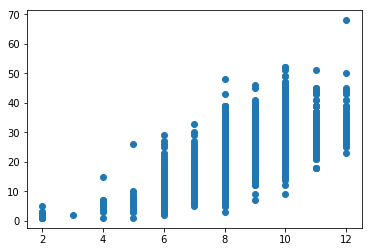

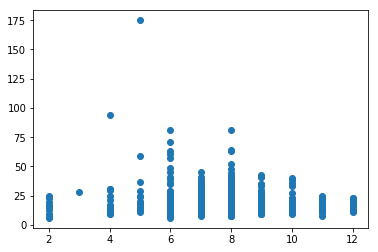

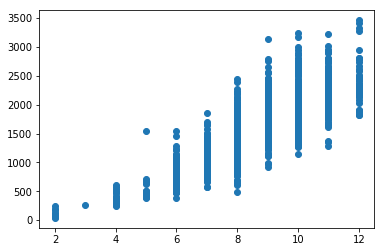

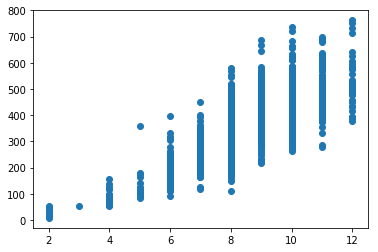

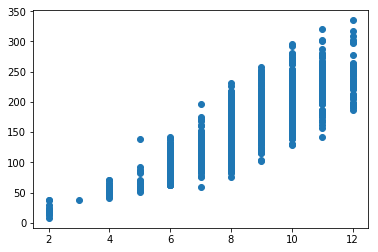

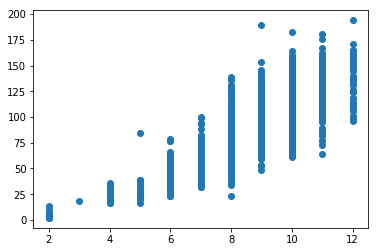

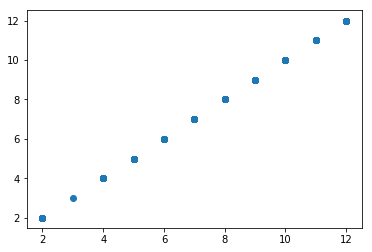

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x = df.iloc[:1783,3], y=df.iloc[:1783,4])
plt.show()
plt.scatter(x = df.iloc[:1783,3], y=df.iloc[:1783,5])
plt.show()
plt.scatter(x = df.iloc[:1783,3], y=df.iloc[:1783,6])
plt.show()
plt.scatter(x = df.iloc[:1783,3], y=df.iloc[:1783,7])
plt.show()
plt.scatter(x = df.iloc[:1783,3], y=df.iloc[:1783,8])
plt.show()
plt.scatter(x = df.iloc[:1783,3], y=df.iloc[:1783,9])
plt.show()
plt.scatter(x = df.iloc[:1783,3], y=df.iloc[:1783,3])
plt.show()



In [ ]:
"""
Training from the data
"""

'\nTraining from the data\n'

In [ ]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [ ]:
classifier = Sequential()

#adding the first hidden layer
classifier.add(Dense(units = 400, kernel_initializer = 'uniform', activation = 'relu', input_dim = 1016))

# Adding the second hidden layer
classifier.add(Dense(units = 200, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the third hidden layer
classifier.add(Dense(units = 20, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the fourth hidden layer
#classifier.add(Dense(units = 500, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the fifth hidden layer
#classifier.add(Dense(units = 100, kernel_initializer = 'uniform', activation = 'relu'))


# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'mean_absolute_error',metrics = ["accuracy"] )

W0721 14:52:52.919079 140078113052544 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0721 14:52:52.961202 140078113052544 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0721 14:52:52.968269 140078113052544 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0721 14:52:53.019750 140078113052544 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [ ]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 400)               406800    
_________________________________________________________________
dense_2 (Dense)              (None, 200)               80200     
_________________________________________________________________
dense_3 (Dense)              (None, 20)                4020      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 21        
Total params: 491,041
Trainable params: 491,041
Non-trainable params: 0
_________________________________________________________________


In [ ]:
classifier.fit(features_train , labels,epochs = 50 , batch_size = 506)

W0721 14:53:20.682950 140078113052544 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0721 14:53:20.794413 140078113052544 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Epoch 1/50
12976/12976 [==============================] - 4s 301us/step - loss: 0.7054 - acc: 0.0000e+00
Epoch 2/50
12976/12976 [==============================] - 0s 12us/step - loss: 0.5102 - acc: 0.0000e+00
Epoch 3/50
12976/12976 [==============================] - 0s 12us/step - loss: 0.4535 - acc: 0.0000e+00
Epoch 4/50
12976/12976 [==============================] - 0s 14us/step - loss: 0.4131 - acc: 0.0000e+00
Epoch 5/50
12976/12976 [==============================] - 0s 13us/step - loss: 0.3709 - acc: 0.0000e+00
Epoch 6/50
12976/12976 [==============================] - 0s 12us/step - loss: 0.3390 - acc: 0.0000e+00
Epoch 7/50
12976/12976 [==============================] - 0s 14us/step - loss: 0.3021 - acc: 0.0000e+00
Epoch 8/50
12976/12976 [==============================] - 0s 14us/step - loss: 0.2766 - acc: 0.0000e+00
Epoch 9/50
12976/12976 [==============================] - 0s 13us/step - loss: 0.2489 - acc: 0.0000e+00
Epoch 10/50
12976/12976 [==============================] - 0s 1

In [ ]:
# Standard scaler of th labels of 8 essay set
sc_obj_label = []
sc_obj_label.extend([sc1,sc2,sc3,sc4,sc5,sc6,sc7,sc8])

In [ ]:
obj_features = []
obj_features.append(cv)              #Bag of words
obj_features.append(onehotencoder)   #essay set

In [ ]:
obj_features.append(sc)              #Standard scaler

In [ ]:
obj_features.append(classifier)

In [ ]:
obj_features.extend([sc1,sc2,sc3,sc4,sc5,sc6,sc7,sc8])

In [ ]:
obj_features

[CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                 dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                 lowercase=True, max_df=1.0, max_features=1000, min_df=1,
                 ngram_range=(1, 1), preprocessor=None, stop_words='english',
                 strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                 tokenizer=None, vocabulary=None),
 OneHotEncoder(categorical_features=[0], categories=None, drop=None,
               dtype=<class 'numpy.float64'>, handle_unknown='error',
               n_values=None, sparse=True),
 StandardScaler(copy=True, with_mean=True, with_std=True),
 StandardScaler(copy=True, with_mean=True, with_std=True),
 StandardScaler(copy=True, with_mean=True, with_std=True),
 StandardScaler(copy=True, with_mean=True, with_std=True),
 StandardScaler(copy=True, with_mean=True, with_std=True),
 StandardScaler(copy=True, with_mean=True, with_std=True),
 StandardScaler(copy=True, with_mean

In [ ]:
import pickle
with open('/content/drive/My Drive/Essay_score/model_new_1.pickle', "wb") as f:
  pickle.dump(len(obj_features), f)
  for value in obj_features:
      pickle.dump(value, f)

In [ ]:
model_list = []
with open('/content/drive/My Drive/Essay_score/model_new.pickle', "rb") as f:
    for _ in range(pickle.load(f)):
        model_list.append(pickle.load(f))


In [ ]:
model_list[3]

In [ ]:
model_pred = model_list[3].predict(features_test)

In [ ]:
model_pred1 = sc1.inverse_transform(model_pred[:valid_list[0]])
model_pred2 = sc2.inverse_transform(model_pred[valid_list[0]:valid_list[1]])
model_pred3 = sc3.inverse_transform(model_pred[valid_list[1]:valid_list[2]])
model_pred4 = sc4.inverse_transform(model_pred[valid_list[2]:valid_list[3]])
model_pred5 = sc5.inverse_transform(model_pred[valid_list[3]:valid_list[4]])
model_pred6 = sc6.inverse_transform(model_pred[valid_list[4]:valid_list[5]])
model_pred7 = sc7.inverse_transform(model_pred[valid_list[5]:valid_list[6]])
model_pred8 = sc8.inverse_transform(model_pred[valid_list[6]:valid_list[7]])

In [ ]:
model_pred = np.concatenate((model_pred1,model_pred2,model_pred3,model_pred4,model_pred5,model_pred6,model_pred7,model_pred8),axis = 0)

In [ ]:
model_pred = model_pred.astype('int64')

In [ ]:
model_pred[:10] , labels_pred[:10]

(array([[8],
        [7],
        [8],
        [8],
        [8],
        [8],
        [8],
        [9],
        [8],
        [9]]), array([[8],
        [7],
        [8],
        [8],
        [8],
        [8],
        [8],
        [9],
        [8],
        [9]], dtype=int32))

In [ ]:
mode_pred = modelmodel_preddf_test = 0
valid_score = 0

In [ ]:
df_test = pd.read_csv('valid_set.tsv' , delimiter = '\t' , encoding = 'charmap')
valid_score = pd.read_csv('valid_sample_submission_5_column.csv' , encoding = 'charmap')

In [ ]:
df_test.head(),valid_score.head()

(   essay_id  essay_set  ... domain1_predictionid  domain2_predictionid
 0      1788          1  ...                 1788                   NaN
 1      1789          1  ...                 1789                   NaN
 2      1790          1  ...                 1790                   NaN
 3      1791          1  ...                 1791                   NaN
 4      1792          1  ...                 1792                   NaN
 
 [5 rows x 5 columns],
    prediction_id  essay_id  essay_set  essay_weight  predicted_score
 0           1788      1788          1           1.0                7
 1           1789      1789          1           1.0                8
 2           1790      1790          1           1.0                9
 3           1791      1791          1           1.0                9
 4           1792      1792          1           1.0                9)

In [ ]:
len(df_test['essay_id']),len(valid_score['essay_id'])

(4218, 4818)

In [ ]:
list1 = []
def present(x):
  if int(x) not in list1:
    list1.append(int(x))
    return 1
  else:
    return np.NaN
valid_score['present'] = valid_score['essay_id'].apply(present)

In [ ]:
valid_score['present'].unique()

array([ 1., nan])

In [ ]:
valid_score = valid_score.dropna(axis = 0)

In [ ]:
df_test.shape , valid_score.shape

((4218, 5), (4218, 6))

In [ ]:
df_test.head(2)

,essay_id,essay_set,essay,domain1_predictionid,domain2_predictionid
0,1788,1,"Dear @ORGANIZATION1, @CAPS1 more and more peop...",1788,NaN
1,1789,1,Dear @LOCATION1 Time @CAPS1 me tell you what I...,1789,NaN


In [ ]:
df_test = df_test.iloc[:,[0,1,2]]

In [ ]:
df_test['sent_count'] = df_test['essay'].apply(sent_count)

In [ ]:
df_test['av_sent_len'] = df_test['essay'].apply(av_sent_len)

In [ ]:
df_test['essay'] = df_test['essay'].apply(clean_essay)

In [ ]:
df_test['word_count'] = df_test['essay'].apply(word_count)

In [ ]:
df_test['uni_word_count'] = df_test['essay'].apply(uni_word_count)

In [ ]:
df_test['noun_count'] = df_test['essay'].apply(noun_count)

In [ ]:
df_test['verb_count'] = df_test['essay'].apply(verb_count)

In [ ]:
df1_test = df_test[df_test['essay_set'] == 1]
df2_test = df_test[df_test['essay_set'] == 2]
df3_test = df_test[df_test['essay_set'] == 3]
df4_test = df_test[df_test['essay_set'] == 4]

df5_test = df_test[df_test['essay_set'] == 5]
df6_test = df_test[df_test['essay_set'] == 6]
df7_test = df_test[df_test['essay_set'] == 7]
df8_test = df_test[df_test['essay_set'] == 8]


In [ ]:
valid_score1 = valid_score[valid_score['essay_set'] == 1]
valid_score2 = valid_score[valid_score['essay_set'] == 2]
valid_score3 = valid_score[valid_score['essay_set'] == 3]
valid_score4 = valid_score[valid_score['essay_set'] == 4]

valid_score5 = valid_score[valid_score['essay_set'] == 5]
valid_score6 = valid_score[valid_score['essay_set'] == 6]
valid_score7 = valid_score[valid_score['essay_set'] == 7]
valid_score8 = valid_score[valid_score['essay_set'] == 8]



In [ ]:
df1_test.shape ,df2_test.shape ,df3_test.shape ,df4_test.shape ,df5_test.shape ,df6_test.shape ,df7_test.shape ,df8_test.shape

((589, 9),
 (600, 9),
 (568, 9),
 (586, 9),
 (601, 9),
 (600, 9),
 (441, 9),
 (233, 9))

In [ ]:
valid_shape = [valid_score1.shape,valid_score2.shape,valid_score3.shape,valid_score4.shape,valid_score5.shape,valid_score6.shape,valid_score7.shape,valid_score8.shape]

In [ ]:
valid_shape

[(589, 6),
 (600, 6),
 (568, 6),
 (586, 6),
 (601, 6),
 (600, 6),
 (441, 6),
 (233, 6)]

In [ ]:
features_test = cv.transform(df_test['essay'])
features_test = features_test.toarray()

In [ ]:
features_test.shape

(4218, 3000)

In [ ]:
df_test.head(2)

,essay_id,essay_set,essay,sent_count,av_sent_len,word_count,uni_word_count,noun_count,verb_count
0,1788,1,Dear more and more people start to use compute...,13,17,221,117,50,47
1,1789,1,Dear Time me tell you what I think of computer...,21,14,306,149,67,61


In [ ]:
temp_test = df_test.iloc[:,[1,3,5,6,7,8]].values
features_test = np.hstack((temp_test , features_test))


In [ ]:
features_test.shape , temp_test.shape

((4218, 3006), (4218, 6))

In [ ]:
features_test.shape

(4218, 3006)

In [ ]:
features_test = onehotencoder.transform(features_test).toarray()
features_test.shape

(4218, 3013)

In [ ]:
features_test = features_test[:,1:]
features_test.shape

(4218, 3012)

In [ ]:
features_test = sc.transform(features_test)

In [ ]:
features_test.shape

(4218, 3012)

In [ ]:
labels_pred = classifier.predict(features_test)

In [ ]:
len(labels_pred)

4218

In [ ]:
valid_shape

[(589, 6),
 (600, 6),
 (568, 6),
 (586, 6),
 (601, 6),
 (600, 6),
 (441, 6),
 (233, 6)]

In [ ]:
valid_list = []
sum = 0
for i in valid_shape:
  sum = sum + i[0]
  valid_list.append(sum)

In [ ]:
valid_list

[589, 1189, 1757, 2343, 2944, 3544, 3985, 4218]

In [ ]:
labels_pred1 = sc1.inverse_transform(labels_pred[:valid_list[0]])
labels_pred2 = sc2.inverse_transform(labels_pred[valid_list[0]:valid_list[1]])
labels_pred3 = sc3.inverse_transform(labels_pred[valid_list[1]:valid_list[2]])
labels_pred4 = sc4.inverse_transform(labels_pred[valid_list[2]:valid_list[3]])
labels_pred5 = sc5.inverse_transform(labels_pred[valid_list[3]:valid_list[4]])
labels_pred6 = sc6.inverse_transform(labels_pred[valid_list[4]:valid_list[5]])
labels_pred7 = sc7.inverse_transform(labels_pred[valid_list[5]:valid_list[6]])
labels_pred8 = sc8.inverse_transform(labels_pred[valid_list[6]:valid_list[7]])

In [ ]:
labels_pred = np.concatenate((labels_pred1,labels_pred2,labels_pred3,labels_pred4,labels_pred5,labels_pred6,labels_pred7,labels_pred8),axis = 0)

In [ ]:
labels_pred.shape

(4218, 1)

In [ ]:
labels_pred = labels_pred.astype('int32')

In [ ]:
labels_pred[:10],valid_score1['predicted_score'][:10]

(array([[8],
        [8],
        [9],
        [8],
        [8],
        [9],
        [8],
        [9],
        [8],
        [9]], dtype=int32), 0     7
 1     8
 2     9
 3     9
 4     9
 5     9
 6     9
 7    11
 8     8
 9    10
 Name: predicted_score, dtype: int64)

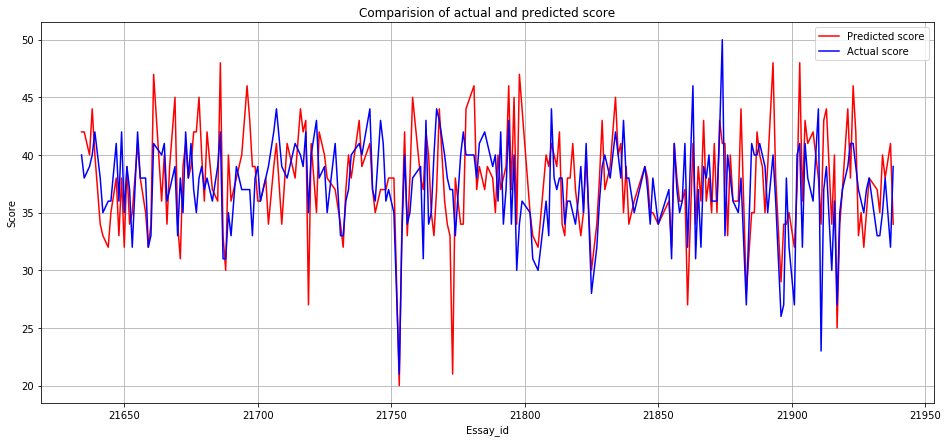

In [ ]:
plt.figure(figsize=[16,7])
plt.title("Comparision of actual and predicted score")
plt.plot(df_test['essay_id'][valid_list[6]:valid_list[7]],labels_pred[valid_list[6]:valid_list[7]], color = 'red',label = 'Predicted score')
plt.plot(df_test['essay_id'][valid_list[6]:valid_list[7]],valid_score['predicted_score'][valid_list[6]:valid_list[7]] , color = 'blue' , label = 'Actual score')
plt.ylabel("Score")
plt.xlabel("Essay_id")
plt.legend()
plt.grid()
plt.show()



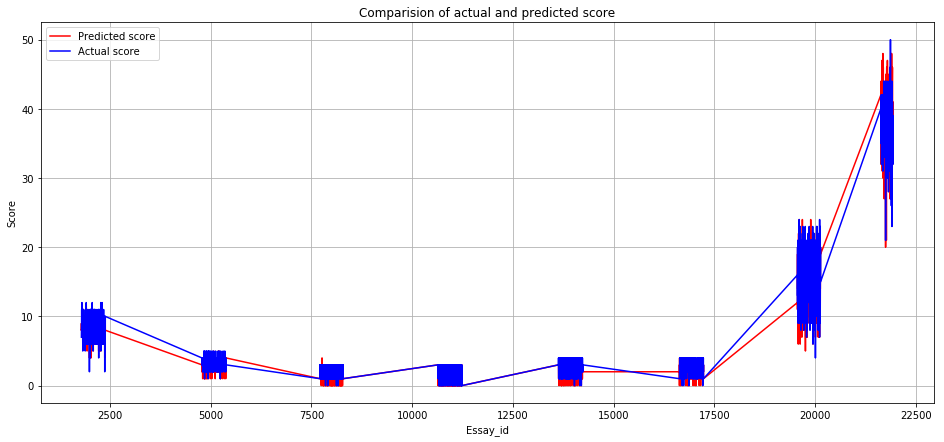

In [ ]:
plt.figure(figsize=[16,7])
plt.title("Comparision of actual and predicted score")
plt.plot(df_test['essay_id'][:] , labels_pred[:], color = 'red',label = 'Predicted score')
plt.plot(df_test['essay_id'][:] , valid_score['predicted_score'][:] , color = 'blue' , label = 'Actual score')
plt.ylabel("Score")
plt.xlabel("Essay_id")
plt.legend()
plt.grid()
plt.show()

